In [1]:
import numpy as np
import matplotlib.pyplot as plt
from general_functions import *
from scipy.integrate import solve_ivp

In [3]:
def one_mapping_phi(N, S, M):

    phi = np.ones((N, S, M)) * 1/S
    phi[:,:,0] = 0
    phi[:,0,0] = 1

    return phi

def one_mapping_phi_bis(N, S, M):

    phi = np.zeros((N, S, M))
    phi[:,0,0] = 1
    phi[:,1:,1:] = 1/(S-1)

    return phi

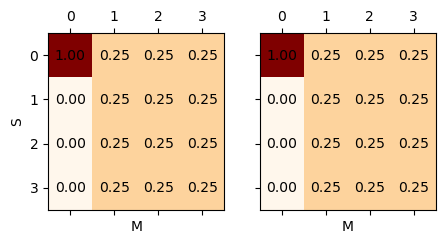

In [4]:
N, S, M, lambd = 2, 4, 4, 0.1

phi = one_mapping_phi(N, S, M)

grid_display(phi, N, S, M, with_title=False)

In [13]:
velocity_vector = deterministic_func(0, phi_to_y(phi, N, S, M), lambd, N, S, M)

print(y_to_phi(velocity_vector, N, S, M))

[[[ 0.00000000e+00 -1.67410714e-04 -1.67410714e-04 -1.67410714e-04]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]]

 [[ 0.00000000e+00 -1.67410714e-04 -1.67410714e-04 -1.67410714e-04]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]
  [ 0.00000000e+00  5.58035714e-05  5.58035714e-05  5.58035714e-05]]]


surprising result: the velocity vector of the phi above is not zero everywhere, instead it shows a trend of diminishing the top two mappings and increasing the four bottom ones (their increase is half that of the top row, which is expected from a 'continuit' perspective)

perhaps the fixed point is the one with the top row all set to zero.

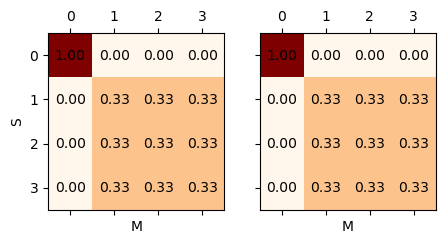

In [14]:
phi = one_mapping_phi_bis(N, S, M)

grid_display(phi, N, S, M, with_title=False)

In [15]:
velocity_vector = deterministic_func(0, phi_to_y(phi, N, S, M), lambd, N, S, M)

print(y_to_phi(velocity_vector, N, S, M)) 

# tiny bit dodge that this is not fully zero, assume that this comes from the numerical precision of the method. 
# try and test this with numerical integration from that point, see if the system changes or stays there.

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]
  [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20 -5.42101086e-20]]]


this is a fixed point of the dynamics, whereas the one above isn't

we can therefore perform linear stability analysis

configuration (N, S, M, lambda) = (2, 4, 4, 0.1)
----------------------------------------------------------------------------
w = -2.31e-03 /// * - *
w = -2.31e-03 /// * - *
w = -2.31e-03 /// * - *
w = -2.31e-03 /// * - *
w =  1.39e-03 /// * - *
w =  1.39e-03 /// * - *
w =  1.39e-03 /// * - *
w =  1.39e-03 /// * - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w =  9.26e-04 /// constraint not satisfied - *
w = -4.63e-04 /// * - *
w = -4.63e-04 /// * - *
w = -4.63e-04 /// * - *
w = -4.63e-04 /// * - *
w =  0.00e+00 /// cons

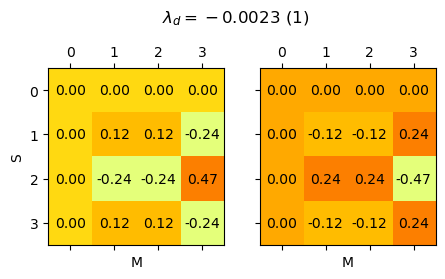

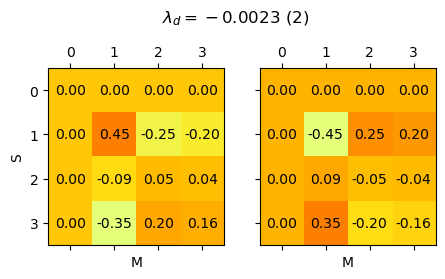

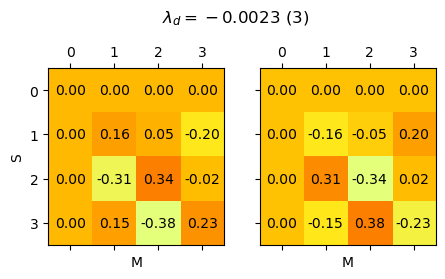

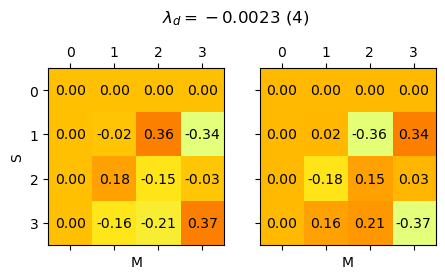

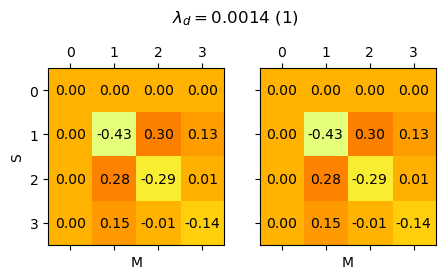

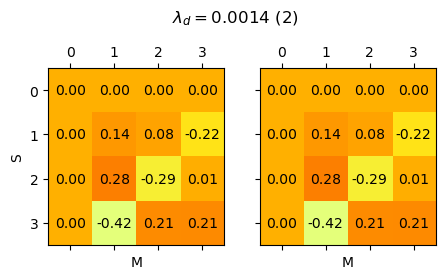

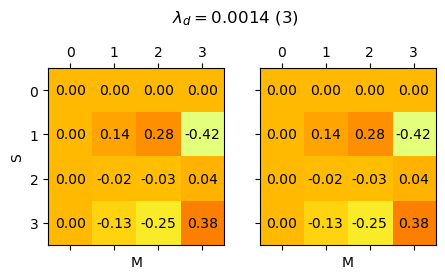

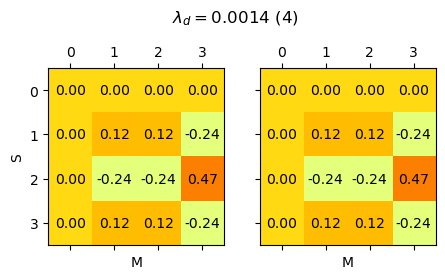

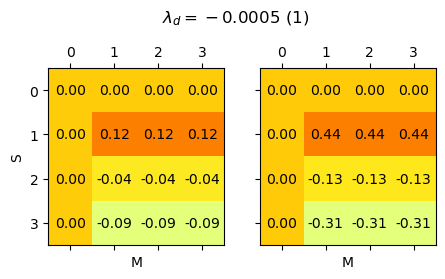

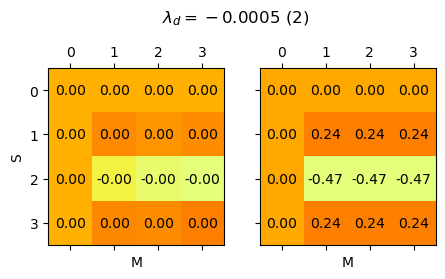

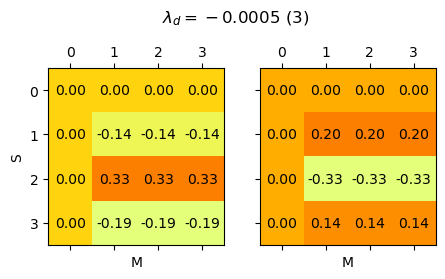

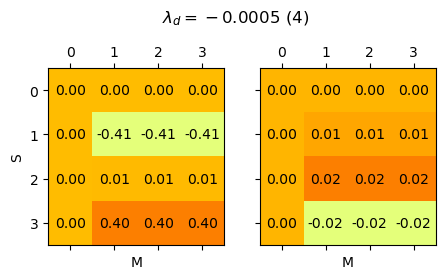

In [16]:
eigen_vals_vecs(phi, N, S, M, mu=lambd, show_evecs=True)

In [5]:
# comparison with (3,3) case

S, M = 3, 3
phi_initial = initiate_phi(N, S, M)

eigen_vals_vecs(phi_initial, N, S, M, mu=lambd, show_evecs=False)

configuration (N, S, M, lambda) = (2, 3, 3, 0.1)
----------------------------------------------------------------------------
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *


not the same eigenvalues exactly, but the same patterns are observed: 4 degenerate positive evals with both speakers altering their grammars in the same way, 4 degenerate negative ones that have the speakers differentiating signals and meanings in opposite directions, and 4 degenerate negative evals that see the same signal being associated with all meanings simultaneously. also suppressed.

configuration (N, S, M, lambda) = (2, 3, 4, 0.1)
----------------------------------------------------------------------------
w = -2.08e-03 /// * - *
w = -2.08e-03 /// * - *
w = -2.08e-03 /// * - *
w = -2.08e-03 /// * - *
w = -2.08e-03 /// * - *
w = -2.08e-03 /// * - *
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  1.39e-03 /// constraint not satisfied - coef vanishes!
w =  6.94e-04 /// * - *
w = -6.94e-04 /// * - *
w = -6.94e-04 /// * - *
w = -6.94e-04 /// * - *
w =  6.94e-04 /// * - *
w = -6.94e-04 /// * - *
w =  6.94e-04 /// * - *
w =  6.94e-04 /// * - *
w =  6.94e-04 /// * - *
w =  6.94e-04 /// * - *


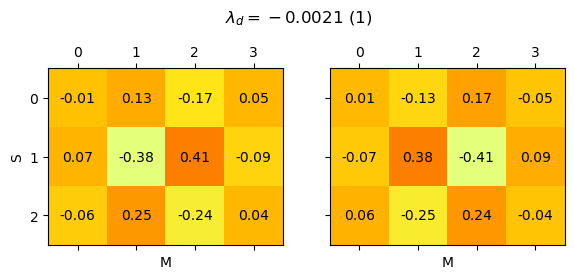

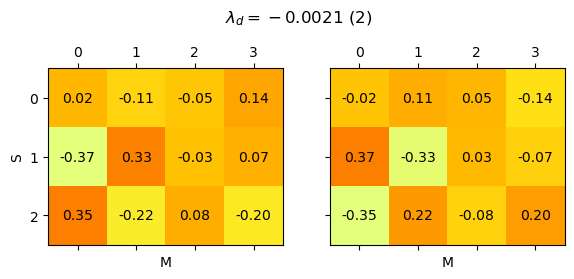

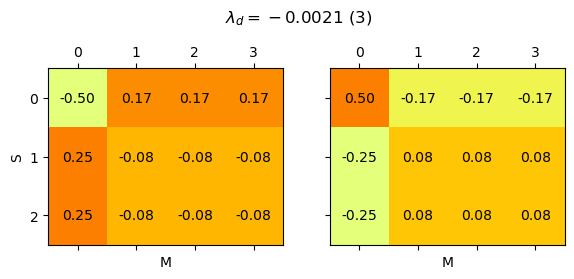

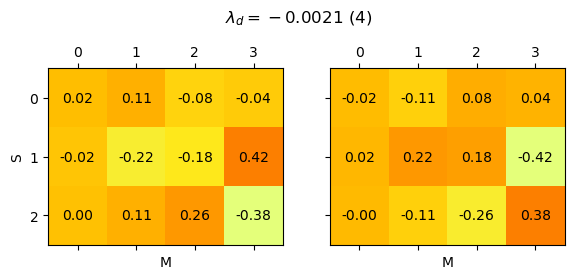

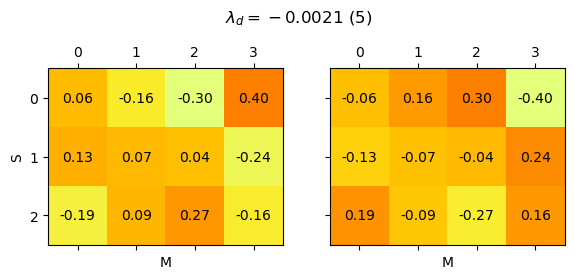

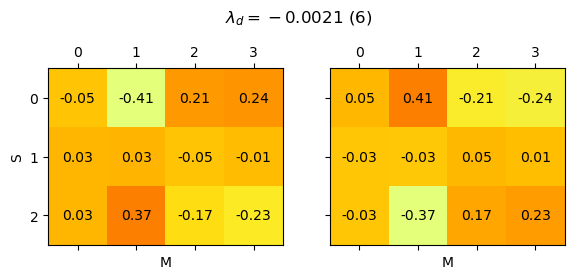

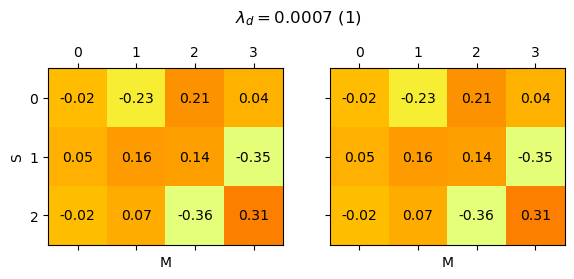

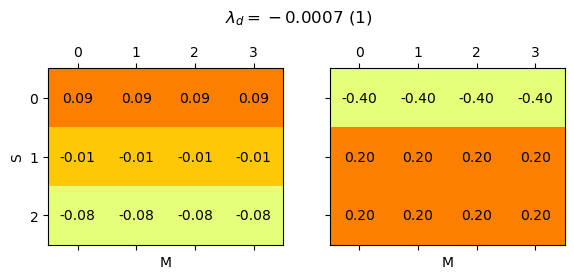

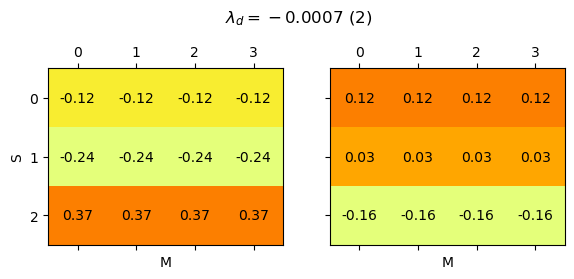

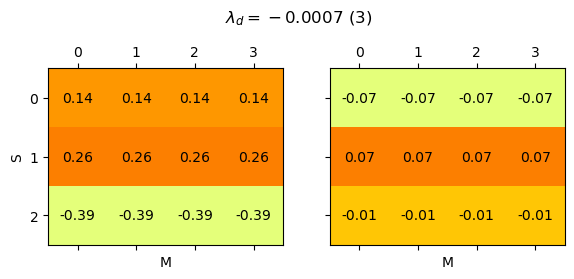

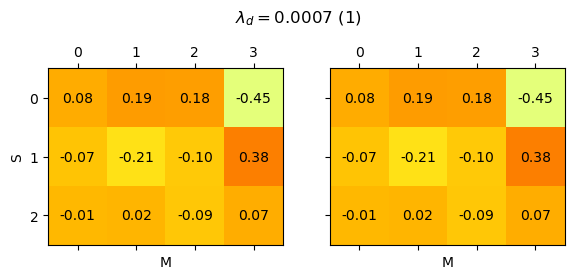

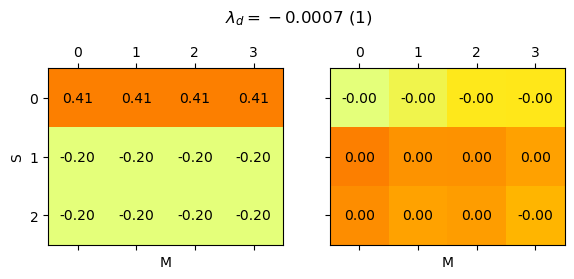

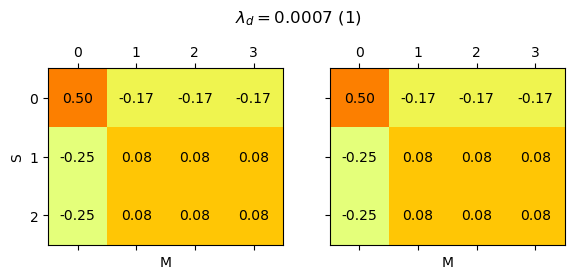

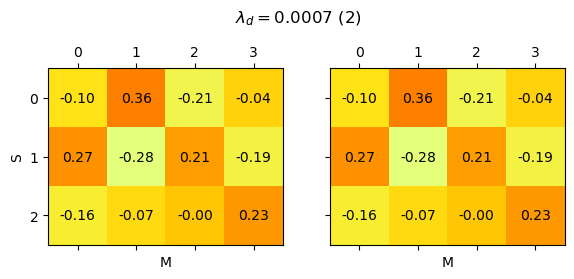

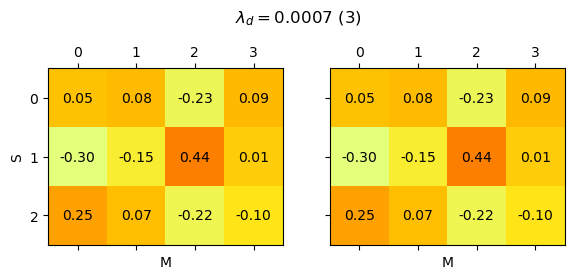

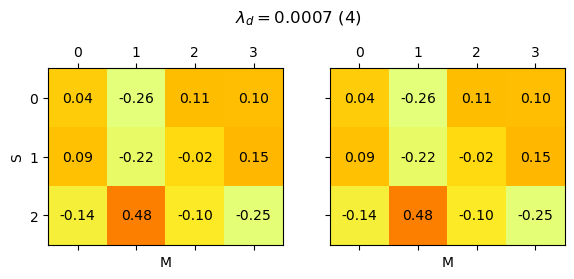

In [6]:
N, S, M, lambd = 2, 3, 4, 0.1
phi_initial = initiate_phi(N, S, M)

eigen_vals_vecs(phi_initial, N, S, M, mu=lambd, show_evecs=True)